In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, accuracy_score  
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


pdata = pd.read_csv("../Data/preprocessed_final.csv")
pdata['Conditie'] = pdata['Conditie'].map({'norm': 0,  'bril': 1})
pdata

,Conditie,SubjectID,Height,Weight,Age,BMI,Alcohol,Alcohol_Class,Balance_MeanVelocity,GaitVelocity,MovementVelocity,std_SegmentData,mad_SegmentData,mean_StepLength,GaitTime
0,0,6,177,70.0,20,22.343516,0.00,0,4.725911,1.175792,1.187491,0.051247,0.040761,0.664377,2.191667
1,1,6,177,70.0,20,22.343516,0.00,0,10.095526,0.899814,0.904473,0.040890,0.032495,0.543385,2.741667
2,0,9,195,86.0,23,22.616700,0.00,0,5.022392,1.114992,1.121095,0.022745,0.019538,0.700817,2.241667
3,1,9,195,86.0,23,22.616700,0.00,0,4.220501,0.895401,0.908965,0.042159,0.033549,0.497828,2.825000
4,0,10,165,65.0,28,23.875115,0.00,0,4.189830,0.822858,0.855915,0.106283,0.095379,0.516998,3.133333
5,1,10,165,65.0,28,23.875115,0.00,0,4.302662,0.878300,0.896931,0.061240,0.053097,0.522667,2.833333
6,0,11,179,68.0,25,21.222808,0.00,0,4.336345,0.989439,1.000792,0.021762,0.018467,0.586470,2.508333
7,1,11,179,68.0,25,21.222808,0.00,0,3.650951,0.873232,0.900053,0.103909,0.088957,0.445404,3.383333
8,0,13,168,70.0,18,24.801587,0.00,0,4.825908,1.049215,1.053802,0.025560,0.020575,0.639974,2.383333
9,1,13,168,70.0,18,24.801587,0.00,0,7.224777,0.955712,0.960144,0.049625,0.040664,0.591725,2.750000


In [15]:
#Splits data into training and validation according to specified ratio
def validation_split(data, ratio):
    sidlist = data['SubjectID'].unique()
    gdata = [data[data['SubjectID']==sid] for sid in sidlist]
    np.random.shuffle(gdata)
    N = len(gdata)
    training = gdata[:int(ratio*N)]
    validation = gdata[(int(ratio*N)):]
    return training,validation

# Converts the arrays in a list to one flattend dataframe
def flatten(data, variable_list):
    return pd.DataFrame(np.vstack(data), columns=variable_list)

def get_split_data(originaldata, variable_list, ratio):
    data = originaldata[variable_list]
    training,validation = validation_split(data, 0.7)
    training = flatten(training, variable_list)
    validation = flatten(validation, variable_list)

    Xtrain = training.drop(['Conditie', 'SubjectID'], axis=1)
    Ytrain = training['Conditie']
    Xtrain = Xtrain.astype(float)
    Ytrain = Ytrain.astype(int)
    
    Xval = validation.drop(['Conditie', 'SubjectID'], axis=1)
    Yval = validation['Conditie']
    Xval = Xval.astype(float)
    Yval = Yval.astype(int)
    return Xtrain, Xval, Ytrain, Yval


In [27]:
collist =  ['SubjectID', 'Conditie', 'GaitTime', 'mean_StepLength', 'Height']
X_train, X_test, y_train, y_test = get_split_data(pdata, collist , 0.7)

X_train = np.array(X_train, dtype=float)
y_train = np.array(y_train, dtype=int)

X_test = np.array(X_test, dtype=float)
y_test = np.array(y_test, dtype=int)

#Standardize X components
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Apply dimensionality reduction
pca = PCA(n_components=3)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

#Fit classifier
classifier = DecisionTreeClassifier(max_depth=3, min_samples_leaf=0.01)  
classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test) 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        47
           1       0.83      0.85      0.84        47

   micro avg       0.84      0.84      0.84        94
   macro avg       0.84      0.84      0.84        94
weighted avg       0.84      0.84      0.84        94



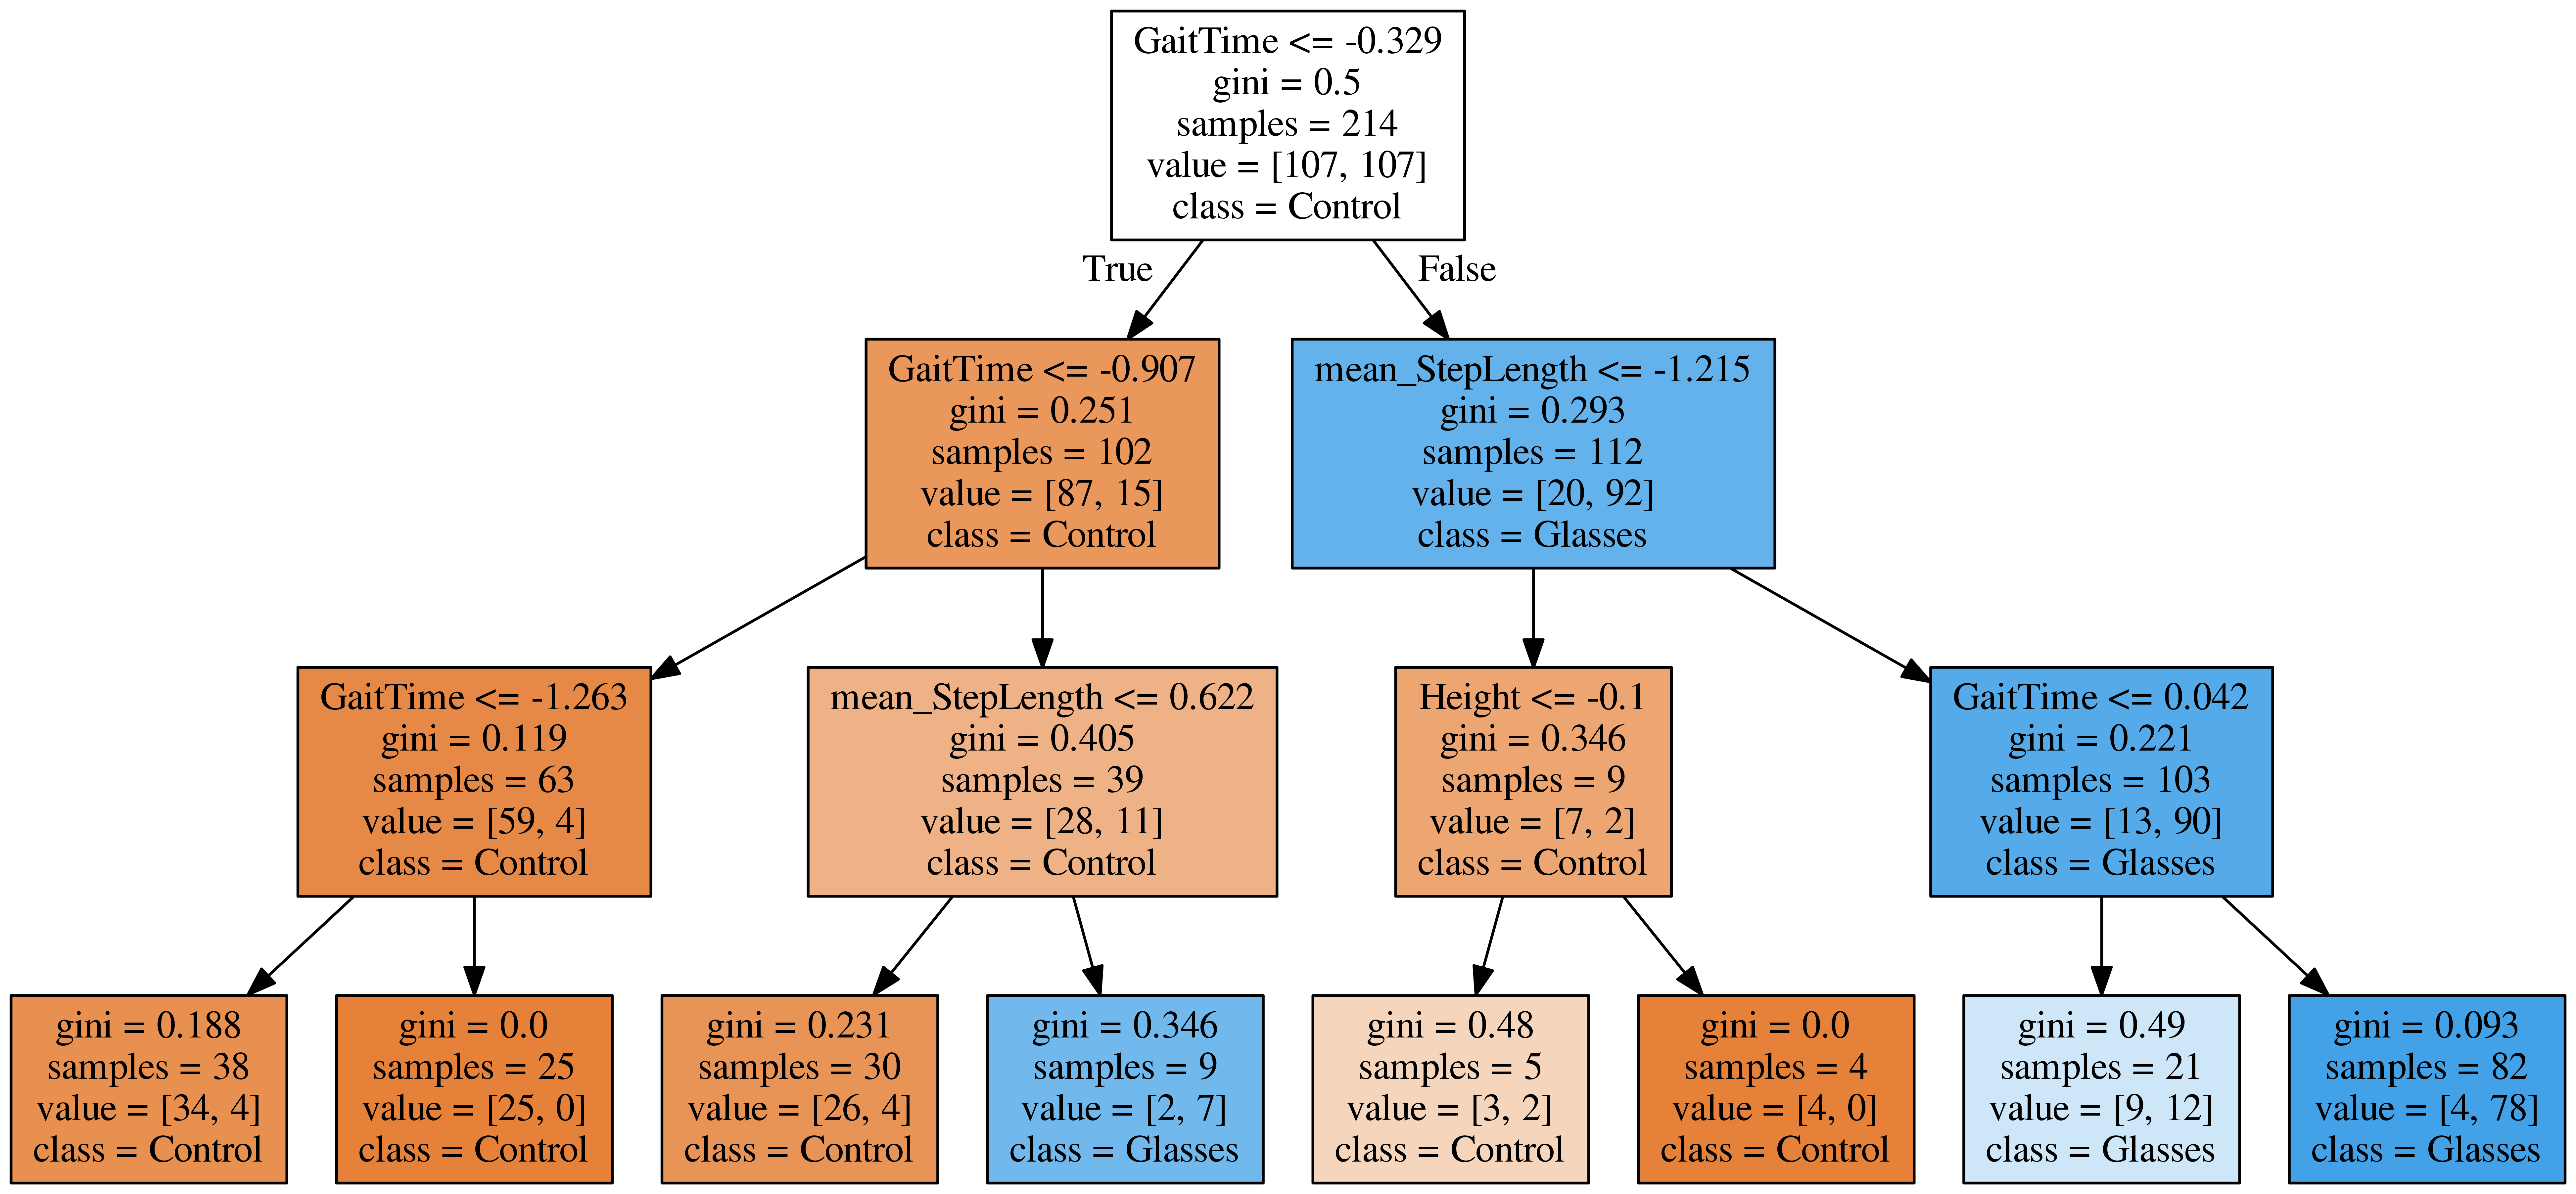

In [28]:
tree.export_graphviz(classifier, out_file='condition_tree.dot', feature_names = collist[2:], class_names= ['Control', 'Glasses'], filled=True)

from subprocess import call
call(['dot', '-Tpng', 'condition_tree.dot', '-o', 'condition_tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'condition_tree.png')

In [3]:
def make_decisions(originaldata, variable_list):
    data = originaldata[variable_list]
    training,validation = validation_split(data, 0.7)
    training = flatten(training, variable_list)
    validation = flatten(validation, variable_list)

    X_train = training.drop(['Conditie', 'SubjectID'], axis=1)
    y_train = training['Conditie']
    X_train = X_train.astype(float)
    y_train = y_train.astype(int)
    
    X_test = validation.drop(['Conditie', 'SubjectID'], axis=1)
    y_test = validation['Conditie']
    X_test = X_test.astype(float)
    y_test = y_test.astype(int)
    
    scaler = StandardScaler()

    # Fit on training set only.
    scaler.fit(X_train)

    # Apply transform to both the training set and the test set.
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    # Make an instance of the Model
    pca = PCA(n_components=2)
    pca.fit(X_train)

    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)
    
    classifier = DecisionTreeClassifier(max_depth=5, min_samples_leaf=0.01)  
    classifier.fit(X_train, y_train)  
    y_pred = classifier.predict(X_test) 

    return accuracy_score(y_test, y_pred)*100

make_decisions(pdata, collist)    
    

78.723404255319153

In [4]:
print('mad_SegmentData, mean_StepLength:', round(np.mean([make_decisions(pdata, ['SubjectID', 'Conditie','mean_StepLength', 'mad_SegmentData']) for i in range(100)]), 2),'%.')
print('mean_StepLength, std_SegmentData:', round(np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'mean_StepLength', 'std_SegmentData']) for i in range(100)]), 2),'%.')
print('GaitTime, mean_StepLength, mad_SegmentData:', round(np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'mean_StepLength', 'GaitTime', 'mad_SegmentData']) for i in range(100)]), 2),'%.')
print('std_SegmentData, GaitVelocity, MovementVelocity, mean_StepLength:', round(np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'GaitVelocity', 'MovementVelocity', 'mean_StepLength', 'std_SegmentData']) for i in range(100)]), 2),'%.')
print('GaitTime, GaitVelocity, MovementVelocity, mean_StepLength, std_SegmentData:', round(np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'GaitVelocity', 'MovementVelocity', 'mean_StepLength', 'GaitTime', 'std_SegmentData']) for i in range(100)]), 2),'%.')
print('GaitTime, mean_StepLength, Height:', round(np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'mean_StepLength', 'GaitTime', 'Height']) for i in range(100)]), 2),'%.')
print('GaitTime, mean_StepLength, Age:', round(np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'mean_StepLength', 'GaitTime', 'Age']) for i in range(100)]), 2),'%.')
print('mean_StepLength, Height:', round(np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'mean_StepLength', 'Height']) for i in range(100)]), 2),'%.')
print('mean_StepLength, Age:', round(np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'mean_StepLength', 'Age']) for i in range(100)]), 2),'%.')
print('GaitTime, Height:', round(np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'GaitTime', 'Height']) for i in range(100)]), 2),'%.')
print('std_SegmentData, Height:', round(np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'mad_SegmentData', 'Height']) for i in range(100)]), 2),'%.')
print('mad_SegmentData, Age:', round(np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'mad_SegmentData', 'Age']) for i in range(100)]), 2),'%.')

mad_SegmentData, mean_StepLength: 82.19 %.


KeyboardInterrupt: 

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


plt.figure()
plot_confusion_matrix(confusion_matrix(Yval, y_pred), classes=['norm', 'bril'],
                      title='Confusion matrix, without normalization')